# FloPy working stack demo

A short demonstration of core `flopy` functionality

In [1]:
from IPython.display import clear_output, display

import sys
from pathlib import Path
from tempfile import TemporaryDirectory

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

proj_root = Path.cwd().parent.parent

# run installed version of flopy or add local path
try:
    import flopy
except:
    sys.path.append(proj_root)
    import flopy

print(sys.version)
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("pandas version: {}".format(pd.__version__))
print("flopy version: {}".format(flopy.__version__))

3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
numpy version: 1.24.2
matplotlib version: 3.6.3
pandas version: 1.5.3
flopy version: 3.3.7


### Model Inputs

In [2]:
# first lets load an existing model
model_ws = proj_root / "examples" / "data" / "freyberg_multilayer_transient"
ml = flopy.modflow.Modflow.load(
    "freyberg.nam",
    model_ws=model_ws,
    verbose=False,
    check=False,
    exe_name="mfnwt",
)

In [3]:
ml.modelgrid

xll:622241.1904510253; yll:3343617.741737109; rotation:15.0; crs:EPSG:32614; units:meters; lenuni:2

Let's looks at some plots

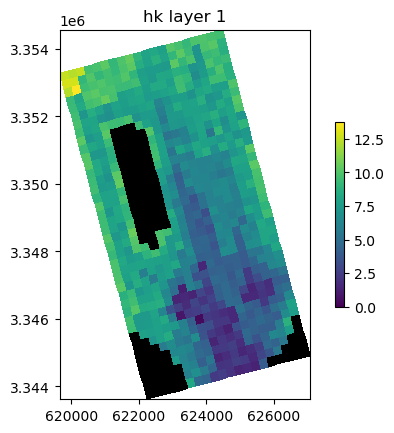

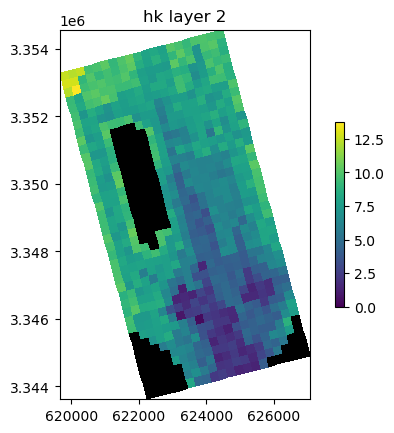

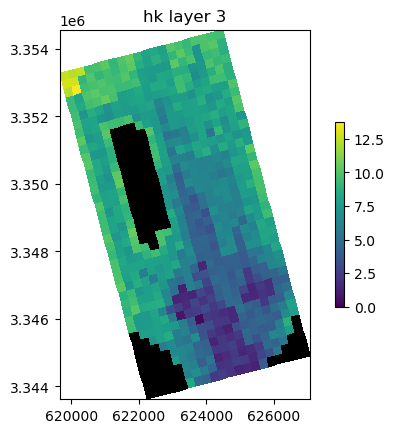

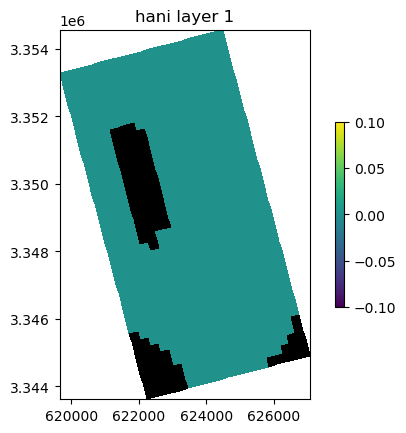

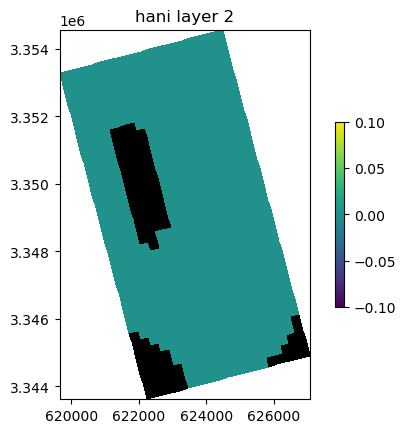

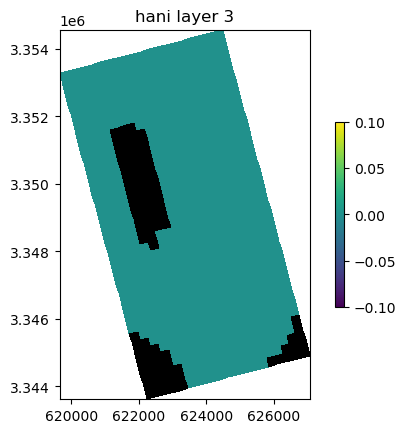

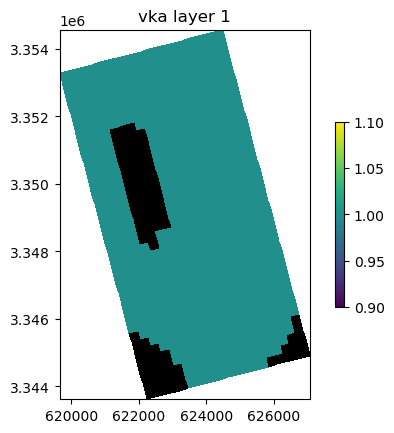

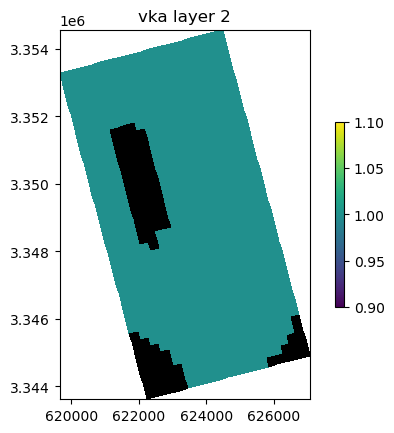

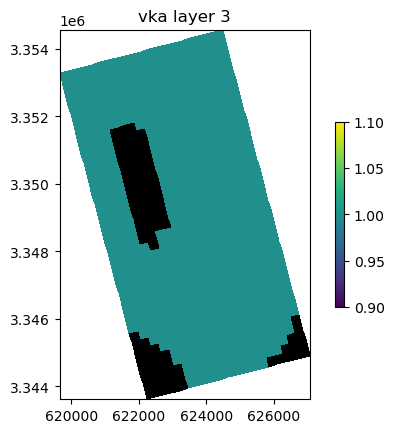

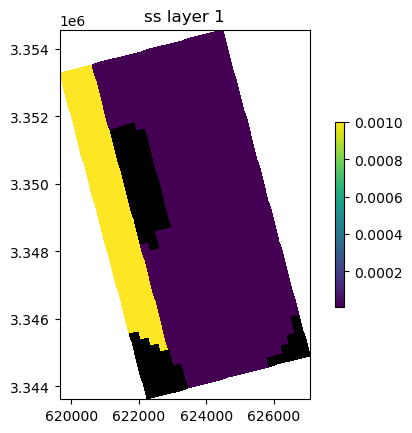

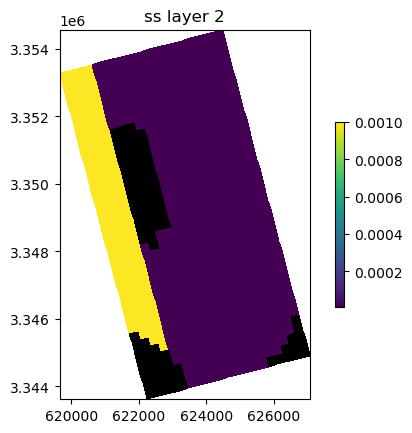

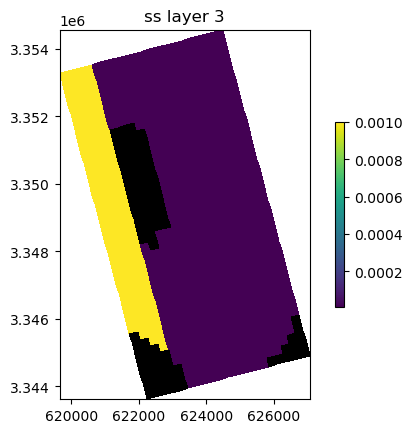

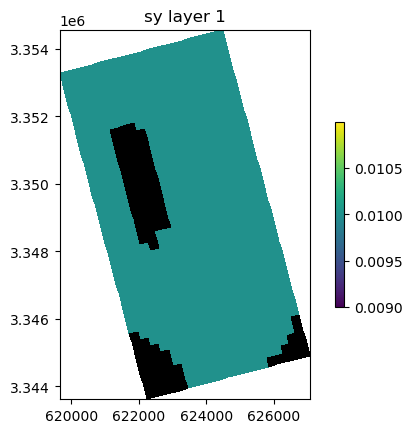

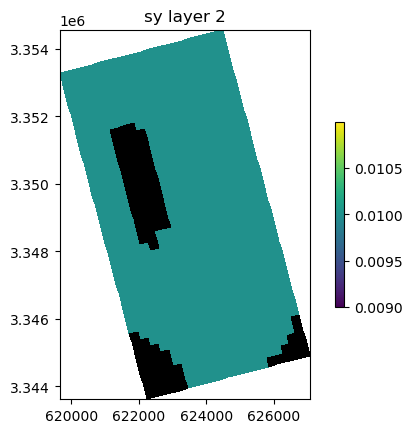

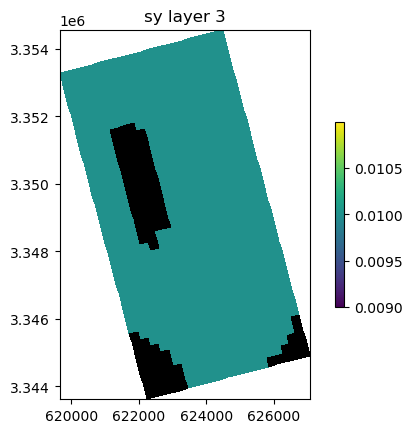

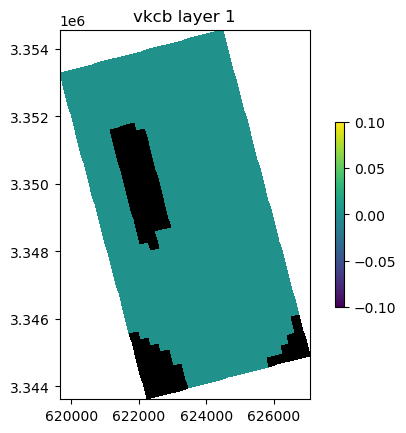

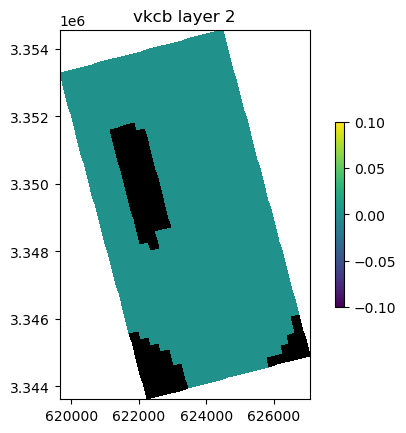

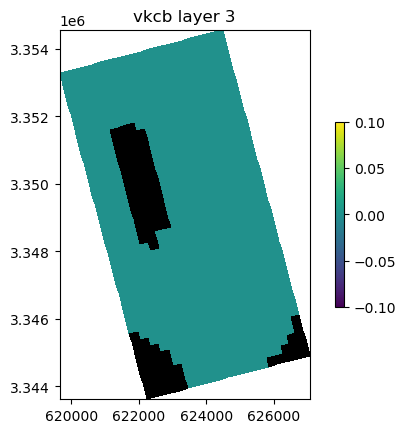

In [4]:
ml.upw.plot();

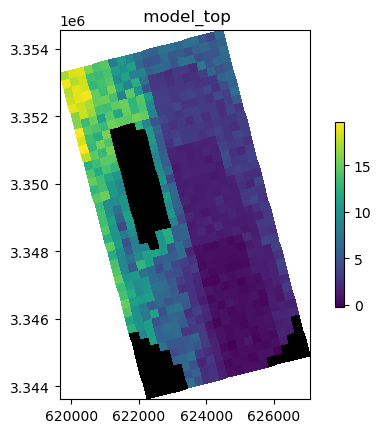

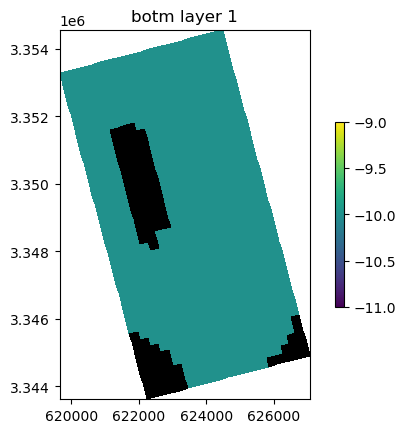

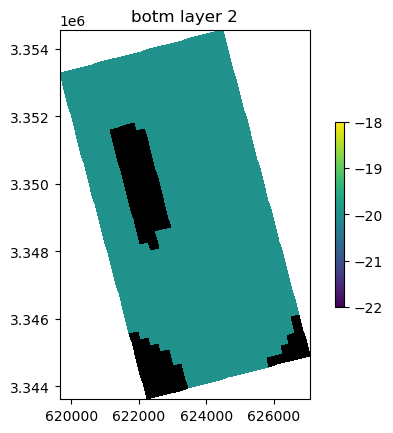

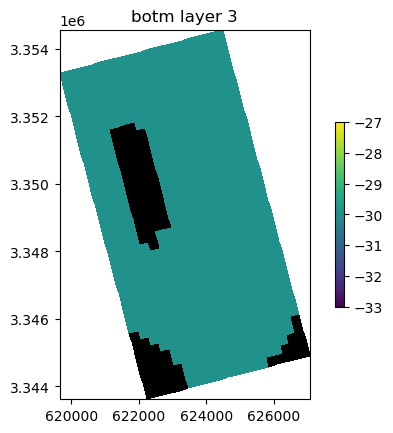

In [5]:
ml.dis.plot();

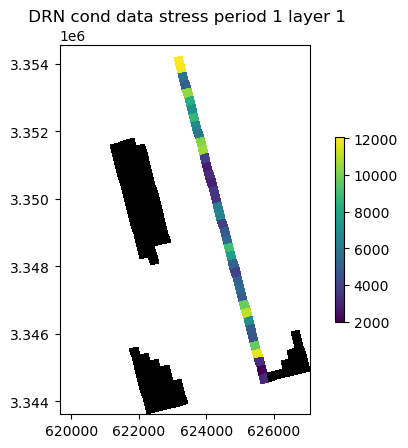

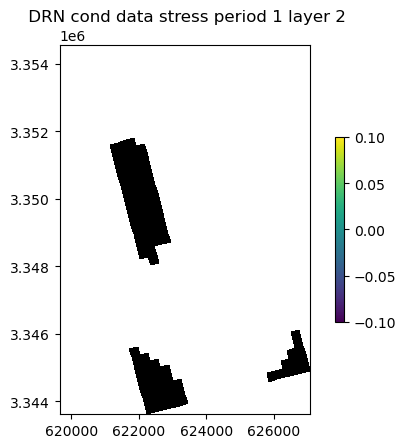

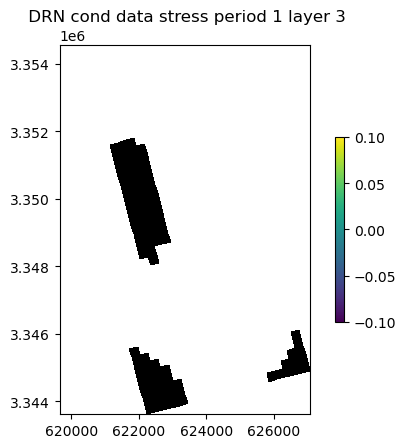

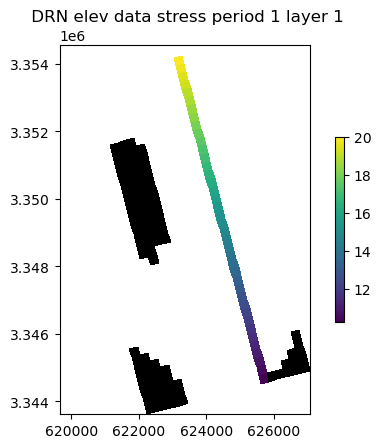

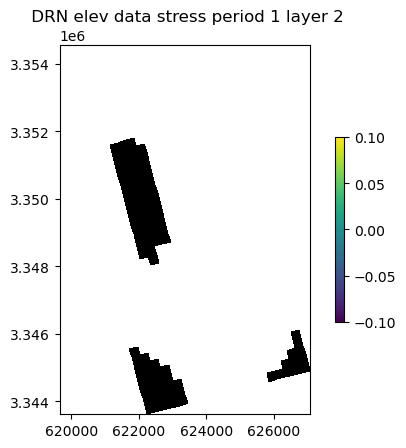

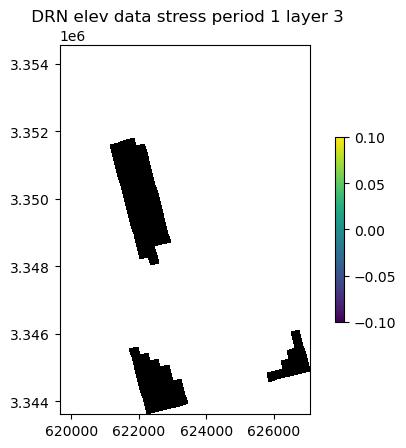

In [6]:
ml.drn.plot(key="cond")
ml.drn.plot(key="elev");

First create a temporary workspace.

In [7]:
# create a temporary workspace
temp_dir = TemporaryDirectory()
workspace = Path(temp_dir.name)

Write a shapefile of the DIS package.

In [8]:
# write the shapefile
ml.dis.export(workspace / "freyberg_dis.shp")

Write a netCDF file with all model inputs.

In [9]:
ml.export(workspace / "freyberg.nc")

initialize_geometry::
model crs: EPSG:32614
initialize_geometry::nc_crs = EPSG:4326
transforming coordinates using = proj=pipeline step inv proj=utm zone=14 ellps=WGS84 step proj=unitconvert xy_in=rad xy_out=deg


Change model directory and external path, modify inputs and write new input files.

In [10]:
ml.external_path = workspace / "ref"
ml.model_ws = workspace
ml.write_input()

Util2d:delr: resetting 'how' to external
Util2d:delc: resetting 'how' to external
Util2d:model_top: resetting 'how' to external
Util2d:botm_layer_0: resetting 'how' to external
Util2d:botm_layer_1: resetting 'how' to external
Util2d:botm_layer_2: resetting 'how' to external
Util2d:ibound_layer_0: resetting 'how' to external
Util2d:ibound_layer_1: resetting 'how' to external
Util2d:ibound_layer_2: resetting 'how' to external
Util2d:strt_layer_0: resetting 'how' to external
Util2d:strt_layer_1: resetting 'how' to external
Util2d:strt_layer_2: resetting 'how' to external
Util2d:rech_1: resetting 'how' to external
Util2d:rech_2: resetting 'how' to external
Util2d:rech_3: resetting 'how' to external
Util2d:rech_4: resetting 'how' to external
Util2d:rech_5: resetting 'how' to external
Util2d:rech_6: resetting 'how' to external
Util2d:rech_7: resetting 'how' to external
Util2d:rech_8: resetting 'how' to external
Util2d:rech_9: resetting 'how' to external
Util2d:rech_10: resetting 'how' to ext

Util2d:rech_29: resetting 'how' to external
Util2d:rech_30: resetting 'how' to external
Util2d:rech_31: resetting 'how' to external
Util2d:rech_32: resetting 'how' to external
Util2d:rech_33: resetting 'how' to external
Util2d:rech_34: resetting 'how' to external
Util2d:rech_35: resetting 'how' to external
Util2d:rech_36: resetting 'how' to external
Util2d:rech_37: resetting 'how' to external
Util2d:rech_38: resetting 'how' to external
Util2d:rech_39: resetting 'how' to external
Util2d:rech_40: resetting 'how' to external
Util2d:rech_41: resetting 'how' to external
Util2d:rech_42: resetting 'how' to external
Util2d:rech_43: resetting 'how' to external
Util2d:rech_44: resetting 'how' to external
Util2d:rech_45: resetting 'how' to external
Util2d:rech_46: resetting 'how' to external
Util2d:rech_47: resetting 'how' to external
Util2d:rech_48: resetting 'how' to external
Util2d:rech_49: resetting 'how' to external
Util2d:rech_50: resetting 'how' to external
Util2d:rech_51: resetting 'how' 

Util2d:rech_82: resetting 'how' to external
Util2d:rech_83: resetting 'how' to external
Util2d:rech_84: resetting 'how' to external
Util2d:rech_85: resetting 'how' to external
Util2d:rech_86: resetting 'how' to external
Util2d:rech_87: resetting 'how' to external
Util2d:rech_88: resetting 'how' to external
Util2d:rech_89: resetting 'how' to external
Util2d:rech_90: resetting 'how' to external
Util2d:rech_91: resetting 'how' to external
Util2d:rech_92: resetting 'how' to external
Util2d:rech_93: resetting 'how' to external
Util2d:rech_94: resetting 'how' to external
Util2d:rech_95: resetting 'how' to external
Util2d:rech_96: resetting 'how' to external
Util2d:rech_97: resetting 'how' to external
Util2d:rech_98: resetting 'how' to external
Util2d:rech_99: resetting 'how' to external
Util2d:rech_100: resetting 'how' to external
Util2d:rech_101: resetting 'how' to external
Util2d:rech_102: resetting 'how' to external
Util2d:rech_103: resetting 'how' to external
Util2d:rech_104: resetting '

Util2d:rech_135: resetting 'how' to external
Util2d:rech_136: resetting 'how' to external
Util2d:rech_137: resetting 'how' to external
Util2d:rech_138: resetting 'how' to external
Util2d:rech_139: resetting 'how' to external
Util2d:rech_140: resetting 'how' to external
Util2d:rech_141: resetting 'how' to external
Util2d:rech_142: resetting 'how' to external
Util2d:rech_143: resetting 'how' to external
Util2d:rech_144: resetting 'how' to external
Util2d:rech_145: resetting 'how' to external
Util2d:rech_146: resetting 'how' to external
Util2d:rech_147: resetting 'how' to external
Util2d:rech_148: resetting 'how' to external
Util2d:rech_149: resetting 'how' to external
Util2d:rech_150: resetting 'how' to external
Util2d:rech_151: resetting 'how' to external
Util2d:rech_152: resetting 'how' to external
Util2d:rech_153: resetting 'how' to external
Util2d:rech_154: resetting 'how' to external
Util2d:rech_155: resetting 'how' to external
Util2d:rech_156: resetting 'how' to external
Util2d:rec

Util2d:rech_204: resetting 'how' to external
Util2d:rech_205: resetting 'how' to external
Util2d:rech_206: resetting 'how' to external
Util2d:rech_207: resetting 'how' to external
Util2d:rech_208: resetting 'how' to external
Util2d:rech_209: resetting 'how' to external
Util2d:rech_210: resetting 'how' to external
Util2d:rech_211: resetting 'how' to external
Util2d:rech_212: resetting 'how' to external
Util2d:rech_213: resetting 'how' to external
Util2d:rech_214: resetting 'how' to external
Util2d:rech_215: resetting 'how' to external
Util2d:rech_216: resetting 'how' to external
Util2d:rech_217: resetting 'how' to external
Util2d:rech_218: resetting 'how' to external
Util2d:rech_219: resetting 'how' to external
Util2d:rech_220: resetting 'how' to external
Util2d:rech_221: resetting 'how' to external
Util2d:rech_222: resetting 'how' to external
Util2d:rech_223: resetting 'how' to external
Util2d:rech_224: resetting 'how' to external
Util2d:rech_225: resetting 'how' to external
Util2d:rec

Util2d:rech_272: resetting 'how' to external
Util2d:rech_273: resetting 'how' to external
Util2d:rech_274: resetting 'how' to external
Util2d:rech_275: resetting 'how' to external
Util2d:rech_276: resetting 'how' to external
Util2d:rech_277: resetting 'how' to external
Util2d:rech_278: resetting 'how' to external
Util2d:rech_279: resetting 'how' to external
Util2d:rech_280: resetting 'how' to external
Util2d:rech_281: resetting 'how' to external
Util2d:rech_282: resetting 'how' to external
Util2d:rech_283: resetting 'how' to external
Util2d:rech_284: resetting 'how' to external
Util2d:rech_285: resetting 'how' to external
Util2d:rech_286: resetting 'how' to external
Util2d:rech_287: resetting 'how' to external
Util2d:rech_288: resetting 'how' to external
Util2d:rech_289: resetting 'how' to external
Util2d:rech_290: resetting 'how' to external
Util2d:rech_291: resetting 'how' to external
Util2d:rech_292: resetting 'how' to external
Util2d:rech_293: resetting 'how' to external
Util2d:rec

Util2d:rech_340: resetting 'how' to external
Util2d:rech_341: resetting 'how' to external
Util2d:rech_342: resetting 'how' to external
Util2d:rech_343: resetting 'how' to external
Util2d:rech_344: resetting 'how' to external
Util2d:rech_345: resetting 'how' to external
Util2d:rech_346: resetting 'how' to external
Util2d:rech_347: resetting 'how' to external
Util2d:rech_348: resetting 'how' to external
Util2d:rech_349: resetting 'how' to external
Util2d:rech_350: resetting 'how' to external
Util2d:rech_351: resetting 'how' to external
Util2d:rech_352: resetting 'how' to external
Util2d:rech_353: resetting 'how' to external
Util2d:rech_354: resetting 'how' to external
Util2d:rech_355: resetting 'how' to external
Util2d:rech_356: resetting 'how' to external
Util2d:rech_357: resetting 'how' to external
Util2d:rech_358: resetting 'how' to external
Util2d:rech_359: resetting 'how' to external
Util2d:rech_360: resetting 'how' to external
Util2d:rech_361: resetting 'how' to external
Util2d:rec

Util2d:rech_406: resetting 'how' to external
Util2d:rech_407: resetting 'how' to external
Util2d:rech_408: resetting 'how' to external
Util2d:rech_409: resetting 'how' to external
Util2d:rech_410: resetting 'how' to external
Util2d:rech_411: resetting 'how' to external
Util2d:rech_412: resetting 'how' to external
Util2d:rech_413: resetting 'how' to external
Util2d:rech_414: resetting 'how' to external
Util2d:rech_415: resetting 'how' to external
Util2d:rech_416: resetting 'how' to external
Util2d:rech_417: resetting 'how' to external
Util2d:rech_418: resetting 'how' to external
Util2d:rech_419: resetting 'how' to external
Util2d:rech_420: resetting 'how' to external
Util2d:rech_421: resetting 'how' to external
Util2d:rech_422: resetting 'how' to external
Util2d:rech_423: resetting 'how' to external
Util2d:rech_424: resetting 'how' to external
Util2d:rech_425: resetting 'how' to external
Util2d:rech_426: resetting 'how' to external
Util2d:rech_427: resetting 'how' to external
Util2d:rec

Util2d:rech_473: resetting 'how' to external
Util2d:rech_474: resetting 'how' to external
Util2d:rech_475: resetting 'how' to external
Util2d:rech_476: resetting 'how' to external
Util2d:rech_477: resetting 'how' to external
Util2d:rech_478: resetting 'how' to external
Util2d:rech_479: resetting 'how' to external
Util2d:rech_480: resetting 'how' to external
Util2d:rech_481: resetting 'how' to external
Util2d:rech_482: resetting 'how' to external
Util2d:rech_483: resetting 'how' to external
Util2d:rech_484: resetting 'how' to external
Util2d:rech_485: resetting 'how' to external
Util2d:rech_486: resetting 'how' to external
Util2d:rech_487: resetting 'how' to external
Util2d:rech_488: resetting 'how' to external
Util2d:rech_489: resetting 'how' to external
Util2d:rech_490: resetting 'how' to external
Util2d:rech_491: resetting 'how' to external
Util2d:rech_492: resetting 'how' to external
Util2d:rech_493: resetting 'how' to external
Util2d:rech_494: resetting 'how' to external
Util2d:rec

Util2d:rech_538: resetting 'how' to external
Util2d:rech_539: resetting 'how' to external
Util2d:rech_540: resetting 'how' to external
Util2d:rech_541: resetting 'how' to external
Util2d:rech_542: resetting 'how' to external
Util2d:rech_543: resetting 'how' to external
Util2d:rech_544: resetting 'how' to external
Util2d:rech_545: resetting 'how' to external
Util2d:rech_546: resetting 'how' to external
Util2d:rech_547: resetting 'how' to external
Util2d:rech_548: resetting 'how' to external
Util2d:rech_549: resetting 'how' to external
Util2d:rech_550: resetting 'how' to external
Util2d:rech_551: resetting 'how' to external
Util2d:rech_552: resetting 'how' to external
Util2d:rech_553: resetting 'how' to external
Util2d:rech_554: resetting 'how' to external
Util2d:rech_555: resetting 'how' to external
Util2d:rech_556: resetting 'how' to external
Util2d:rech_557: resetting 'how' to external
Util2d:rech_558: resetting 'how' to external
Util2d:rech_559: resetting 'how' to external
Util2d:rec

Util2d:rech_604: resetting 'how' to external
Util2d:rech_605: resetting 'how' to external
Util2d:rech_606: resetting 'how' to external
Util2d:rech_607: resetting 'how' to external
Util2d:rech_608: resetting 'how' to external
Util2d:rech_609: resetting 'how' to external
Util2d:rech_610: resetting 'how' to external
Util2d:rech_611: resetting 'how' to external
Util2d:rech_612: resetting 'how' to external
Util2d:rech_613: resetting 'how' to external
Util2d:rech_614: resetting 'how' to external
Util2d:rech_615: resetting 'how' to external
Util2d:rech_616: resetting 'how' to external
Util2d:rech_617: resetting 'how' to external
Util2d:rech_618: resetting 'how' to external
Util2d:rech_619: resetting 'how' to external
Util2d:rech_620: resetting 'how' to external
Util2d:rech_621: resetting 'how' to external
Util2d:rech_622: resetting 'how' to external
Util2d:rech_623: resetting 'how' to external
Util2d:rech_624: resetting 'how' to external
Util2d:rech_625: resetting 'how' to external
Util2d:rec

Util2d:rech_671: resetting 'how' to external
Util2d:rech_672: resetting 'how' to external
Util2d:rech_673: resetting 'how' to external
Util2d:rech_674: resetting 'how' to external
Util2d:rech_675: resetting 'how' to external
Util2d:rech_676: resetting 'how' to external
Util2d:rech_677: resetting 'how' to external
Util2d:rech_678: resetting 'how' to external
Util2d:rech_679: resetting 'how' to external
Util2d:rech_680: resetting 'how' to external
Util2d:rech_681: resetting 'how' to external
Util2d:rech_682: resetting 'how' to external
Util2d:rech_683: resetting 'how' to external
Util2d:rech_684: resetting 'how' to external
Util2d:rech_685: resetting 'how' to external
Util2d:rech_686: resetting 'how' to external
Util2d:rech_687: resetting 'how' to external
Util2d:rech_688: resetting 'how' to external
Util2d:rech_689: resetting 'how' to external
Util2d:rech_690: resetting 'how' to external
Util2d:rech_691: resetting 'how' to external
Util2d:rech_692: resetting 'how' to external
Util2d:rec

Util2d:rech_739: resetting 'how' to external
Util2d:rech_740: resetting 'how' to external
Util2d:rech_741: resetting 'how' to external
Util2d:rech_742: resetting 'how' to external
Util2d:rech_743: resetting 'how' to external
Util2d:rech_744: resetting 'how' to external
Util2d:rech_745: resetting 'how' to external
Util2d:rech_746: resetting 'how' to external
Util2d:rech_747: resetting 'how' to external
Util2d:rech_748: resetting 'how' to external
Util2d:rech_749: resetting 'how' to external
Util2d:rech_750: resetting 'how' to external
Util2d:rech_751: resetting 'how' to external
Util2d:rech_752: resetting 'how' to external
Util2d:rech_753: resetting 'how' to external
Util2d:rech_754: resetting 'how' to external
Util2d:rech_755: resetting 'how' to external
Util2d:rech_756: resetting 'how' to external
Util2d:rech_757: resetting 'how' to external
Util2d:rech_758: resetting 'how' to external
Util2d:rech_759: resetting 'how' to external
Util2d:rech_760: resetting 'how' to external
Util2d:rec

Util2d:rech_806: resetting 'how' to external
Util2d:rech_807: resetting 'how' to external
Util2d:rech_808: resetting 'how' to external
Util2d:rech_809: resetting 'how' to external
Util2d:rech_810: resetting 'how' to external
Util2d:rech_811: resetting 'how' to external
Util2d:rech_812: resetting 'how' to external
Util2d:rech_813: resetting 'how' to external
Util2d:rech_814: resetting 'how' to external
Util2d:rech_815: resetting 'how' to external
Util2d:rech_816: resetting 'how' to external
Util2d:rech_817: resetting 'how' to external
Util2d:rech_818: resetting 'how' to external
Util2d:rech_819: resetting 'how' to external
Util2d:rech_820: resetting 'how' to external
Util2d:rech_821: resetting 'how' to external
Util2d:rech_822: resetting 'how' to external
Util2d:rech_823: resetting 'how' to external
Util2d:rech_824: resetting 'how' to external
Util2d:rech_825: resetting 'how' to external
Util2d:rech_826: resetting 'how' to external
Util2d:rech_827: resetting 'how' to external
Util2d:rec

Util2d:rech_870: resetting 'how' to external
Util2d:rech_871: resetting 'how' to external
Util2d:rech_872: resetting 'how' to external
Util2d:rech_873: resetting 'how' to external
Util2d:rech_874: resetting 'how' to external
Util2d:rech_875: resetting 'how' to external
Util2d:rech_876: resetting 'how' to external
Util2d:rech_877: resetting 'how' to external
Util2d:rech_878: resetting 'how' to external
Util2d:rech_879: resetting 'how' to external
Util2d:rech_880: resetting 'how' to external
Util2d:rech_881: resetting 'how' to external
Util2d:rech_882: resetting 'how' to external
Util2d:rech_883: resetting 'how' to external
Util2d:rech_884: resetting 'how' to external
Util2d:rech_885: resetting 'how' to external
Util2d:rech_886: resetting 'how' to external
Util2d:rech_887: resetting 'how' to external
Util2d:rech_888: resetting 'how' to external
Util2d:rech_889: resetting 'how' to external
Util2d:rech_890: resetting 'how' to external
Util2d:rech_891: resetting 'how' to external
Util2d:rec

Util2d:rech_931: resetting 'how' to external
Util2d:rech_932: resetting 'how' to external
Util2d:rech_933: resetting 'how' to external
Util2d:rech_934: resetting 'how' to external
Util2d:rech_935: resetting 'how' to external
Util2d:rech_936: resetting 'how' to external
Util2d:rech_937: resetting 'how' to external
Util2d:rech_938: resetting 'how' to external
Util2d:rech_939: resetting 'how' to external
Util2d:rech_940: resetting 'how' to external
Util2d:rech_941: resetting 'how' to external
Util2d:rech_942: resetting 'how' to external
Util2d:rech_943: resetting 'how' to external
Util2d:rech_944: resetting 'how' to external
Util2d:rech_945: resetting 'how' to external
Util2d:rech_946: resetting 'how' to external
Util2d:rech_947: resetting 'how' to external
Util2d:rech_948: resetting 'how' to external
Util2d:rech_949: resetting 'how' to external
Util2d:rech_950: resetting 'how' to external
Util2d:rech_951: resetting 'how' to external
Util2d:rech_952: resetting 'how' to external
Util2d:rec

Util2d:rech_966: resetting 'how' to external
Util2d:rech_967: resetting 'how' to external
Util2d:rech_968: resetting 'how' to external
Util2d:rech_969: resetting 'how' to external
Util2d:rech_970: resetting 'how' to external
Util2d:rech_971: resetting 'how' to external
Util2d:rech_972: resetting 'how' to external
Util2d:rech_973: resetting 'how' to external
Util2d:rech_974: resetting 'how' to external
Util2d:rech_975: resetting 'how' to external
Util2d:rech_976: resetting 'how' to external
Util2d:rech_977: resetting 'how' to external
Util2d:rech_978: resetting 'how' to external
Util2d:rech_979: resetting 'how' to external
Util2d:rech_980: resetting 'how' to external
Util2d:rech_981: resetting 'how' to external
Util2d:rech_982: resetting 'how' to external
Util2d:rech_983: resetting 'how' to external
Util2d:rech_984: resetting 'how' to external
Util2d:rech_985: resetting 'how' to external
Util2d:rech_986: resetting 'how' to external
Util2d:rech_987: resetting 'how' to external
Util2d:rec

Util2d:rech_1038: resetting 'how' to external
Util2d:rech_1039: resetting 'how' to external
Util2d:rech_1040: resetting 'how' to external
Util2d:rech_1041: resetting 'how' to external
Util2d:rech_1042: resetting 'how' to external
Util2d:rech_1043: resetting 'how' to external
Util2d:rech_1044: resetting 'how' to external
Util2d:rech_1045: resetting 'how' to external
Util2d:rech_1046: resetting 'how' to external
Util2d:rech_1047: resetting 'how' to external
Util2d:rech_1048: resetting 'how' to external
Util2d:rech_1049: resetting 'how' to external
Util2d:rech_1050: resetting 'how' to external
Util2d:rech_1051: resetting 'how' to external
Util2d:rech_1052: resetting 'how' to external
Util2d:rech_1053: resetting 'how' to external
Util2d:rech_1054: resetting 'how' to external
Util2d:rech_1055: resetting 'how' to external
Util2d:rech_1056: resetting 'how' to external
Util2d:rech_1057: resetting 'how' to external
Util2d:rech_1058: resetting 'how' to external
Util2d:rech_1059: resetting 'how' 

Util2d:hk: resetting 'how' to external
Util2d:vk: resetting 'how' to external
Util2d:ss: resetting 'how' to external
Util2d:sy: resetting 'how' to external
Util2d:hk: resetting 'how' to external
Util2d:vk: resetting 'how' to external
Util2d:ss: resetting 'how' to external
Util2d:sy: resetting 'how' to external
Util2d:hk: resetting 'how' to external
Util2d:vk: resetting 'how' to external
Util2d:ss: resetting 'how' to external
Util2d:sy: resetting 'how' to external


Now run the model.

In [11]:
ml.run_model(silent=True)

(True, [])

### Inspecting outputs

First, let's look at the list file. The list file summarizes the model's results.

In [12]:
mfl = flopy.utils.MfListBudget(model_ws / "freyberg.list")
df_flux, df_vol = mfl.get_dataframes(start_datetime="10-21-2015")
df_flux

,STORAGE_IN,CONSTANT_HEAD_IN,WELLS_IN,DRAINS_IN,RECHARGE_IN,TOTAL_IN,STORAGE_OUT,CONSTANT_HEAD_OUT,WELLS_OUT,DRAINS_OUT,RECHARGE_OUT,TOTAL_OUT,IN-OUT,PERCENT_DISCREPANCY
2015-10-22,0.000000,0.000000,0.0,0.0,6276.861816,6276.861816,0.000000,2446.318848,0.000000,3830.650146,0.0,6276.968750,-0.106900,-0.0
2015-10-23,635.447998,0.000000,0.0,0.0,6428.198730,7063.646484,31.594000,2430.337891,1302.403198,3299.415039,0.0,7063.750000,-0.103500,-0.0
2015-10-24,1361.814941,0.000000,0.0,0.0,5397.295898,6759.110840,9.152200,2369.628174,1618.676392,2761.639648,0.0,6759.096191,0.014648,0.0
2015-10-25,677.577209,0.000000,0.0,0.0,5931.377441,6608.954590,180.233307,2353.585449,1498.694702,2576.461670,0.0,6608.975586,-0.020996,-0.0
2015-10-26,697.818298,0.000000,0.0,0.0,8378.572266,9076.390625,1051.897461,2417.248291,3119.501953,2487.737305,0.0,9076.384766,0.005859,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-18,1298.433350,23.293699,0.0,0.0,4240.286133,5562.013184,1606.280396,1909.538574,1930.483154,115.724899,0.0,5562.026855,-0.013672,-0.0
2018-10-19,920.468689,25.997499,0.0,0.0,4082.749512,5029.215820,1659.194702,1892.605835,1279.166382,198.258896,0.0,5029.225586,-0.009766,-0.0
2018-10-20,496.671387,20.047001,0.0,0.0,5053.779297,5570.497559,2428.291016,1933.045898,794.582886,414.594513,0.0,5570.514648,-0.017090,-0.0
2018-10-21,230.320999,9.045700,0.0,0.0,6168.920410,6408.287109,2335.759521,2006.124268,1373.782593,692.638123,0.0,6408.304688,-0.017578,-0.0


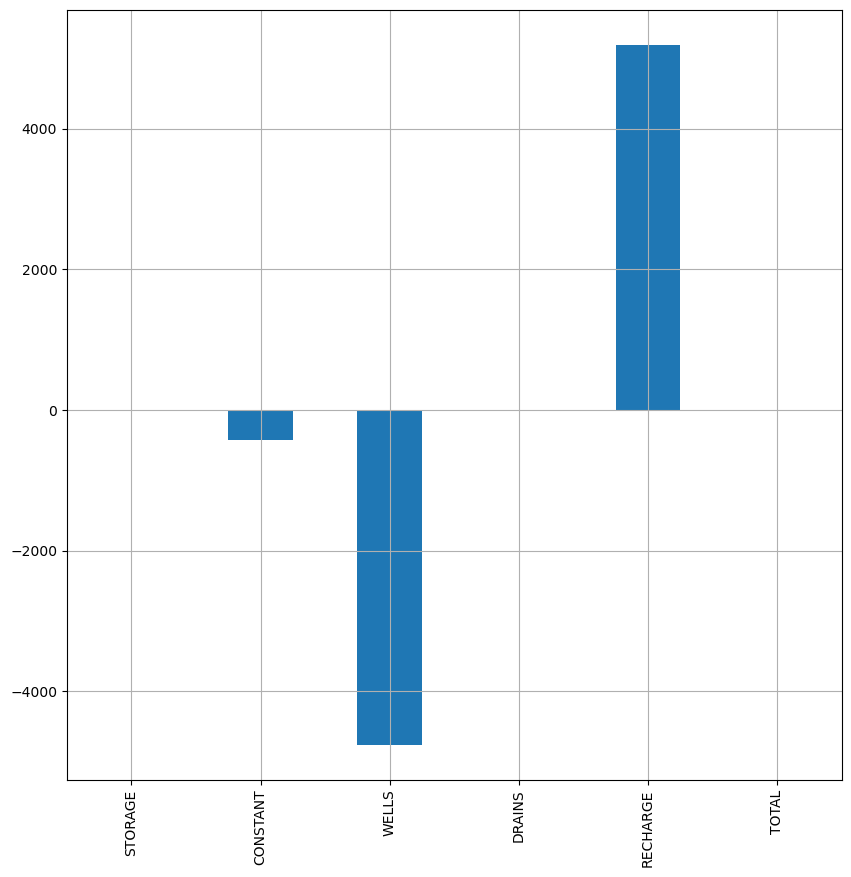

In [13]:
groups = df_flux.groupby(lambda x: x.split("_")[-1], axis=1).groups
df_flux_in = df_flux.loc[:, groups["IN"]]
df_flux_in.columns = df_flux_in.columns.map(lambda x: x.split("_")[0])

df_flux_out = df_flux.loc[:, groups["OUT"]]
df_flux_out.columns = df_flux_out.columns.map(lambda x: x.split("_")[0])


df_flux_delta = df_flux_in - df_flux_out
df_flux_delta.iloc[-1, :].plot(kind="bar", figsize=(10, 10), grid=True);

Now let's look at the simulated head.

In [14]:
# if you pass the model instance, then the plots will be offset and rotated
h = flopy.utils.HeadFile(model_ws / "freyberg.hds", model=ml)
h.times

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

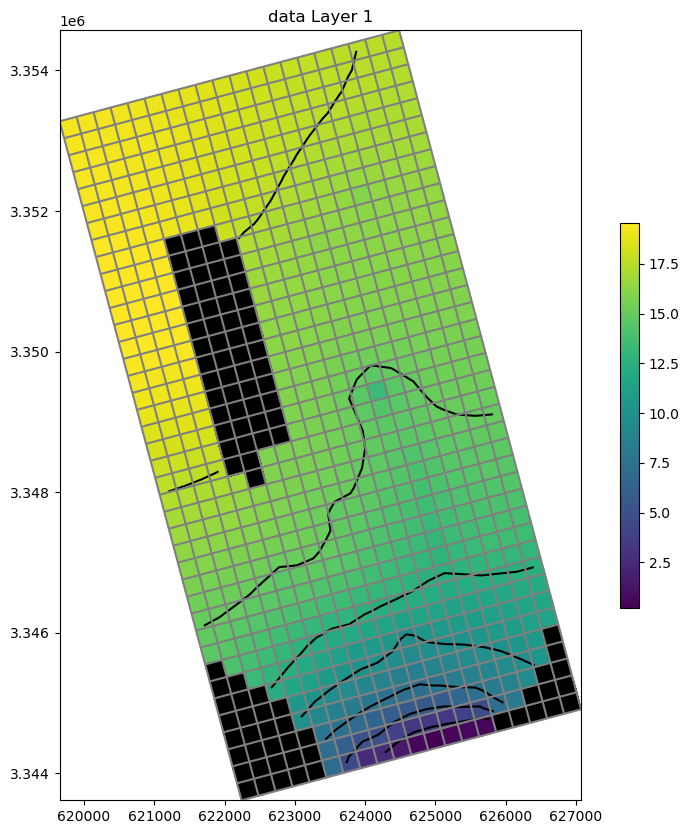

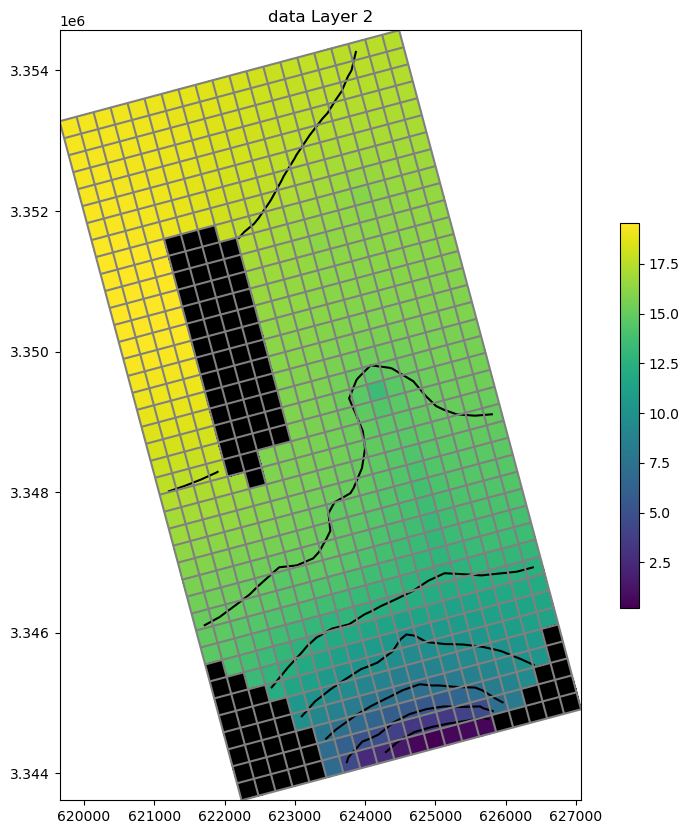

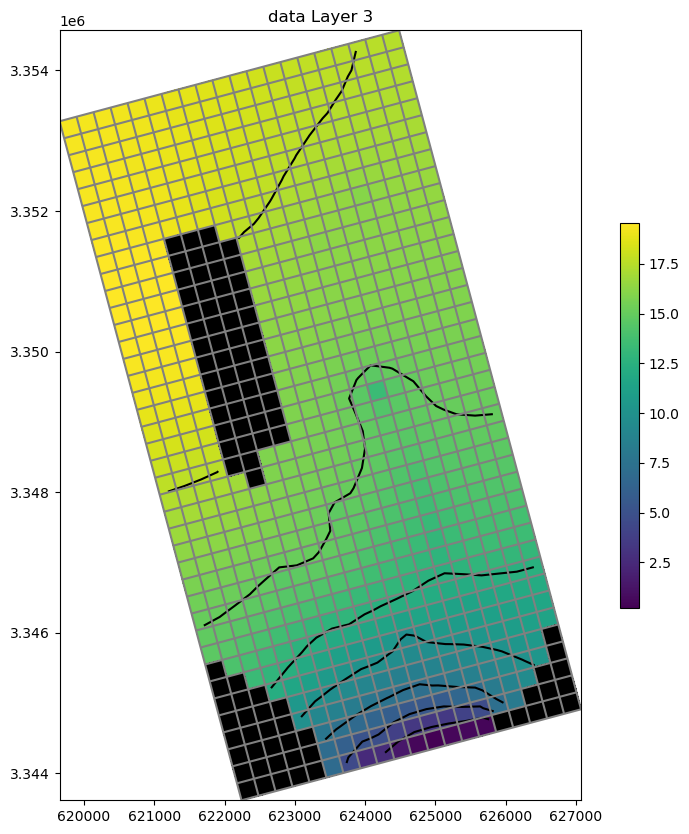

In [15]:
h.plot(totim=900, contour=True, grid=True, colorbar=True, figsize=(10, 10));

We can write the heads to a shapefile.

In [16]:
h.to_shapefile(ml.model_ws / "freyburg_head.shp", verbose=False)

Finally, let's make an animation of the simulated head over the time domain.

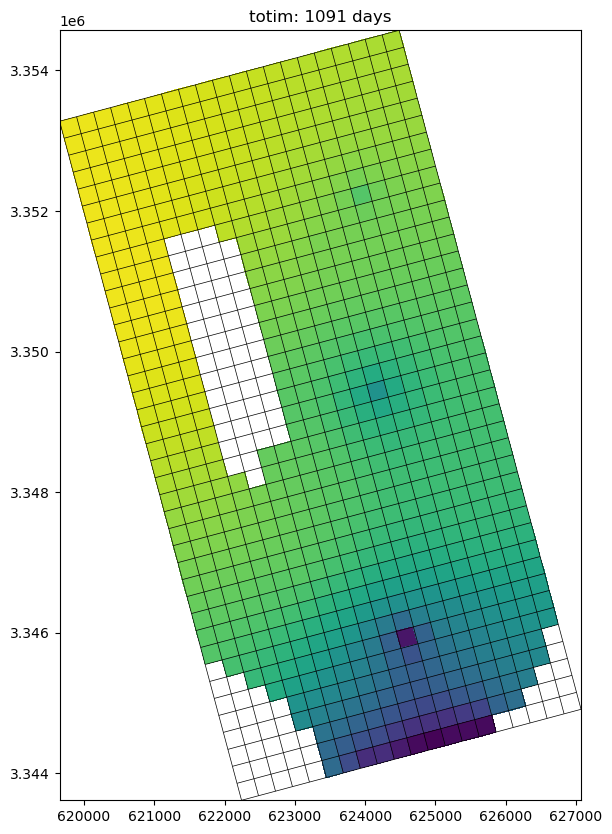

In [17]:
f = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, aspect="equal")
for t in h.times[0:-1:10]:
    ax.cla()

    ax.set_title(f"totim: {t:4.0f} days")
    mm = flopy.plot.PlotMapView(model=ml, ax=ax)
    mm.plot_array(h.get_data(totim=t), vmin=0, vmax=20)
    mm.plot_grid(lw=0.5, color="black")

    display(f)
    clear_output(wait=True)
    plt.pause(0.1);

In [18]:
try:
    # ignore PermissionError on Windows
    temp_dir.cleanup()
except:
    pass